# **Problemas de Classificação com Machine Learning: Detecção de Fraudes em Transações de Cartão de Crédito**

## **Introdução**

A Ciência de Dados e os métodos de *machine learning* têm desempenhado um papel fundamental na detecção de fraudes em transações de cartões de crédito. Esses métodos permitem que as instituições financeiras identifiquem e combatam atividades fraudulentas de forma mais eficiente e precisa.

Um dos principais desafios na detecção de fraudes é a grande quantidade de dados gerados pelas transações de cartões de crédito. Esses dados podem incluir informações sobre o valor da transação, a localização do estabelecimento comercial, o horário da transação, o tipo de cartão utilizado, entre outros. Analisar manualmente esses dados para identificar fraudes seria uma tarefa extremamente complexa e demorada.

Nesse contexto se encaixam os métodos de *machine learning* em problemas de classificação. Esses problemas consistem em atribuir categorias a dados baseados em informações aprendidas a partir de conjuntos de dados de treinamento. Os métodos de machine learning permitem que os computadores aprendam com os dados prévios e identifiquem padrões que podem indicar atividades fraudulentas. Por exemplo, um algoritmo de *machine learning* pode ser treinado com dados históricos de transações fraudulentas e legítimas. Com base nesse treinamento, o algoritmo pode aprender a identificar características específicas que são comuns às transações fraudulentas, como valores altos, localização incomum ou horário suspeito.

### **Objetivo**

O objetivo deste trabalho é utilizar programação orientada a objeto para construir uma classe em Python que utiliza três diferentes modelos de *machine learning* para classificar transações de cartão de cŕedito como fraudulentas ou não.



## **Dataset**

* O *dataset* utilizado contém informações sobre transações feitas com cartões de crédito por titulares europeus em setembro de 2013. Os dados abrangem transações ocorridas em um período de dois dias, onde foram identificadas 492 fraudes em um total de 284.807 transações.
    
  * As variáveis de entrada neste *dataset* são exclusivamente numéricas e resultam de uma transformação utilizando Análise de Componentes Principais (PCA, do inglês Principal Component Analysis). A transformação PCA é uma técnica estatística multivariada que tem como objetivo principal reduzir a dimensionalidade de um conjunto de dados, ou seja, reduzir o número de variáveis analisadas. Essa técnica procura manter o máximo de variação ou informação presente no conjunto original de variáveis de modo que não se percam informações significativas na redução.
  
    Em termos mais técnicos, a PCA transforma as variáveis originais em um novo conjunto de variáveis, chamadas componentes principais, que são não correlacionadas e que capturam a maior parte da variação presente no conjunto de dados original. Essas novas variáveis são obtidas através de combinações lineares das variáveis originais.

* Neste *dataset*, as *features* originais dos dados foram omitidas por razões de confidencialidade para com os titulares dos cartões. As variáveis V1 a V28 representam os principais componentes obtidos por meio da transformação PCA, sendo que apenas as variáveis "Time" e "Amount" não foram submetidas a essa transformação. "Time" indica o intervalo em segundos entre cada transação e a primeira do conjunto de dados, enquanto "Amount" representa o valor da transação. A variável "Class" é a resposta do modelo, assumindo o valor 1 em caso de fraude e 0 caso contrário.

Nota: O *dataset* foi obtido através do site Kaggle e pode ser baixado neste link:
[Dataset: Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data?select=creditcard.csv)

### **Atributos do Dataset**

O *dataset* é um arquivo do tipo csv composto por 31 colunas, sendo:
 - "Time": Tempo decorrido entre a primeira trasação do conjunto de dados e a atual transação
 - "V1" a "V28": Variáveis numéricas resultantes da transformação PCA
 - "Amount": Valor da transação
 - "Class": Classificação como fraude ou não (1 se sim 0 se não)

## **Importando as Bibliotecas**

In [95]:
################################################################################
#                            Required Libraries                                #
################################################################################
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## **Definindo a classe CreditCardFraudDetector**

In [96]:
class CreditCardFraudDetector:
    """
    A class to detect fraud in credit card transactions.


    Attributes:
        - data : pandas dataframe of the CSV file
        - features: pandas series of the features to be used in the training
        - target: pandas series of the classes to be predict
        - models_avg_score: dictionary with the average score for the models
        - models: dictionary with the models
        - fill: string with 81 '*' characters to better display the results 
        
    
    Methods:
    
        - load_data(filepath): loads the CSV data into the raw_data attribute.
        - summarize_data(): summarize the data, exhibiting the first and last 
                            five rows of data and general information.
        - no_nan_data(): removes NaN values from the dataset.
        - visualize_data(): plot graphics to visualize the data.
        - preprocess_data(): prepares the data for machine learning, including 
                             handling missing values and scaling.
        - create_features(): creates new a features from the existing data.
        - balance_data(): balance the data using random undersampling.
        - split_data(): splits the data into training and testing sets.
        - train_models(): trains three different machine learning models: 
                          Random Forest, Logistic Regression and Support 
                          Vector Machine.
        - select_best_model(): selects the best performing model based on 
                               cross-validation. 
        - plot_learning_curve(): plots the learning curve for the best model
      
    """

    def __init__(self):
      self.data = None
      self.features = None
      self.target = None
      self.models_avg_score = {}
      self.models = {}
      self.fill = 81*"*" # to better separate the prints

    def load_data(self, filepath):
      """ 
      Loads the CSV data into the data attribute. 
      """
    
      self.data = pd.read_csv(filepath)
              
    def summarize_data(self):
      """ 
      Summarizes general information about the dataset 
      """
      
      print(self.fill)
      print(" First five and last five rows of the dataset ".center(81))
      print(self.fill)
      display(self.data.head())
      display(self.data.tail())
        
      print(self.fill)  
      print(" General information about dataset: ".center(81))
      print(self.fill)
      self.data.info()
      print("")
      
      print(self.fill)  
      print(" General statistical description of the dataset: ".center(81))
      print(self.fill)
      display(self.data.describe())
    
    def no_nan_data(self):  
        """
        Handle missing values if any 
        """
        self.data = self.data.dropna()
        print(self.fill)  
        print(" General information about dataset: ".center(81))
        print(self.fill)
        self.data.info()
        print("")
        
    def visualize_data(self):
        
        """
        Shows in graphs the number of Fraud and Non-Fraud classes.
        
        """
        
        # The argument "normalize" divides the count by the total number 
        # of values
        
        fraud_counts = self.data['Class'].value_counts(normalize=True) * 100

        plt.figure(figsize=(10, 5))
        plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', 
                startangle=140,
                wedgeprops = {'edgecolor' : 'black', 'linewidth': 1})
        plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
        plt.axis('equal')
        plt.show()
        

        plt.figure(figsize=(8, 5))
        ax = sns.histplot(data=self.data, x='Class', bins=2, kde=False, 
                          hue='Class', legend = False)
        plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.xticks([0.25, 0.75], ['Non-Fraud', 'Fraud'])
        
        # Add counts as legend
        fraud_count = self.data['Class'].sum()
        non_fraud_count = len(self.data) - fraud_count
        
        plt.text(1.5*min(ax.get_xticks()), 0.8*max(ax.get_yticks()), 
                 f'Non-Fraud: {non_fraud_count}', fontsize=10, 
                 verticalalignment='top', horizontalalignment='right')
        plt.text(1.1*max(ax.get_xticks()), 0.8*max(ax.get_yticks()), 
                 f'Fraud: {fraud_count}', fontsize=10, 
                 verticalalignment='top', horizontalalignment='right')

        plt.show()
        
    def preprocess_data(self):
        
        """
        Prepares the data for machine learning, including handling missing 
        values and scaling.
        
        """
        from sklearn.preprocessing import RobustScaler
        
                
        # Scaling the 'Amount' and 'Time' features
        scaler = RobustScaler() # RobustScaler is less prone to outliers
        self.data['ScaledAmount'] = scaler.fit_transform(
            self.data['Amount'].values.reshape(-1, 1)
        )
        self.data['ScaledTime'] = scaler.fit_transform(
            self.data['Time'].values.reshape(-1, 1)
        )

        # Drop the original 'Time' and 'Amount' columns
        self.data.drop(['Time', 'Amount'], axis=1, inplace=True)

        
        # Show the new scaled dataset
        print(self.fill)
        print(" First five rows of the scaled dataset ".center(81))
        print(self.fill)
        display(self.data.head())
        
        
    def create_features(self):
        """
        Creates new a feature from the existing data.

        """
        # Add a new feature representing the square of the first 
        # principal component
        self.data['V1_squared'] = self.data['V1'] ** 2

    def balance_data(self, seed=42):
        """
        Balance the data using random undersampling
        """
    
        # Shuffle the data
        shuffled_data = self.data.sample(frac=1, random_state=seed)

        # Extract fraud and non-fraud classes
        fraud_df = shuffled_data[shuffled_data['Class'] == 1]
        non_fraud_df = shuffled_data[shuffled_data['Class'] == 
                                     0][:len(fraud_df)]

        # Concatenate the balanced data
        self.data = pd.concat([fraud_df, non_fraud_df])

        # Shuffle the balanced data
        self.data = self.data.sample(frac=1, random_state=seed)


    def split_data(self):
        """
        Splits the data into training and testing sets.
          
        """
        from sklearn.model_selection import train_test_split
        
        self.features = self.data.drop('Class', axis=1)
        self.target = self.data['Class']
        
        # This is used for undersampling
        return train_test_split(self.features, self.target, 
                                test_size=0.2, random_state=42)
    
    def train_models(self, X_train, y_train):
        """
        Trains three different machine learning models: Random Forest, 
        Logistic Regression and Support Vector Machine.
        """

        # ----------------------------------------------------------------
        # Random Forest
        # ----------------------------------------------------------------        
        rf = RandomForestClassifier(n_estimators=100, criterion='gini')
        rf.fit(X_train, y_train)
        self.models['Random Forest'] = rf
        
        # ----------------------------------------------------------------
        # Logistic Regression
        # ----------------------------------------------------------------        
        lr = LogisticRegression(penalty = 'l2', tol = 1e-4, solver='liblinear', 
                                max_iter = 100)
        lr.fit(X_train, y_train)
        self.models['Logistic Regression'] = lr
        
        # ----------------------------------------------------------------
        # Support Vector Machine
        # ----------------------------------------------------------------        
        svm = SVC(kernel = 'rbf', gamma = 'auto', tol = 1e-3)
        svm.fit(X_train, y_train)
        self.models['SVM'] = svm
        

    def select_best_model(self, X_train, y_train, X_test, y_test, cv=5):
        
        """
        Selects the best performing model based on cross-validation.
        Generates a summary of the cross-validation results and evaluate
        the overfitting for the best model.
        """
        import numpy as np
        from sklearn.model_selection import cross_validate, train_test_split
        from sklearn.metrics import accuracy_score, precision_score
        from sklearn.metrics import recall_score, f1_score
        
        metrics = ['accuracy', 'precision', 'recall', 'f1']
        results = {}
        for model_name, model in self.models.items():
            cv_results = cross_validate(model, X_train, y_train, cv=cv, 
                                        scoring=metrics)
            results[model_name] = {
                'Accuracy': cv_results['test_accuracy'].mean(),
                'Precision': cv_results['test_precision'].mean(),
                'Recall': cv_results['test_recall'].mean(),
                'F1': cv_results['test_f1'].mean()
            }
        
        for model_name, metrics in results.items():
            metrics_values_array = np.array(list(metrics.values()))
            avg_score = metrics_values_array.mean()
            self.models_avg_score[model_name] = avg_score 

        best_model_name = max(self.models_avg_score, key=
                              self.models_avg_score.get)
        best_model = self.models[best_model_name]  
        
        overfitting_evaluation = {}
        for metric in metrics:
            train_score = results[best_model_name][metric]
            test_score = f1_score(y_test, best_model.predict(X_test))
            overfitting_evaluation[metric] = train_score - test_score

        print(self.fill)
        print("Cross-Validation Summary".center(81))
        print(self.fill)
        for model_name, metrics_dict in results.items():
            print(f"\n{model_name} Model:")

            for metric, score in metrics_dict.items():
                metric_length = len(metric)
                print(f"\t{metric}: {score:.4f}")
            print(f"\tAverage Score: {self.models_avg_score[model_name]:.4f}")
        
        print(f"\n\nBest performing model: {best_model_name}")
        
        print(f"\n\n{self.fill}")
        print(f"{best_model_name} Overfitting Evaluation".center(81))
        print(self.fill)
        print()
        for metric, value in overfitting_evaluation.items():
            print(f"{metric}: {value:.4f}")
            
    
        # Print main chosen hyperparameters
        print(f"\n\n{self.fill}")
        print(f"Main Chosen Hyperparameters for {best_model_name}".center(81))
        print(self.fill)
        if best_model_name == 'Random Forest':
            print(f"\nn_estimators: {best_model.n_estimators}")
            print(f"criterion: {best_model.criterion}")

        elif best_model_name == 'Logistic Regression':
            print("\nsolver:", best_model.solver)
            print("penalty:", best_model.penalty)
            print("tol:", best_model.tol)
            print("max_iter:", best_model.max_iter)
        
        elif best_model_name == 'SVM':
            print("\nkernel:", best_model.kernel)
            print("gamma:", best_model.gamma)
            print("tol:", best_model.tol)


    def plot_learning_curve(self, X, y, train_sizes=np.linspace(0.1, 1.0, 5), 
                            cv=5):
        """
        Plots the learning curve of the chosen model.
        """
        from sklearn.model_selection import learning_curve
    
        # Get the best model
        best_model_name = max(self.models_avg_score, key=
                              self.models_avg_score.get)
        best_model = self.models[best_model_name]
    
        # Calculate learning curve
        train_sizes, train_scores, validation_scores = learning_curve(
            best_model, X, y, train_sizes=train_sizes, cv=cv)
    
        # Calculate mean and standard deviation of training scores 
        # and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        validation_scores_mean = np.mean(validation_scores, axis=1)
        validation_scores_std = np.std(validation_scores, axis=1)
    
        # Plot learning curve
        plt.figure(figsize=(10, 6))
        plt.title(f'{best_model_name}: Learning Curve')
        plt.xlabel('Training Size')
        plt.ylabel('Score')
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, 
                         validation_scores_mean - validation_scores_std,
                         validation_scores_mean + validation_scores_std, 
                         alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    
        plt.legend(loc="best")
        plt.show()

## Carregando e Exibindo os Dados

In [97]:
detector = CreditCardFraudDetector()
detector.load_data('creditcard.csv')

detector.summarize_data()

*********************************************************************************
                   First five and last five rows of the dataset                  
*********************************************************************************


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


*********************************************************************************
                        General information about dataset:                       
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


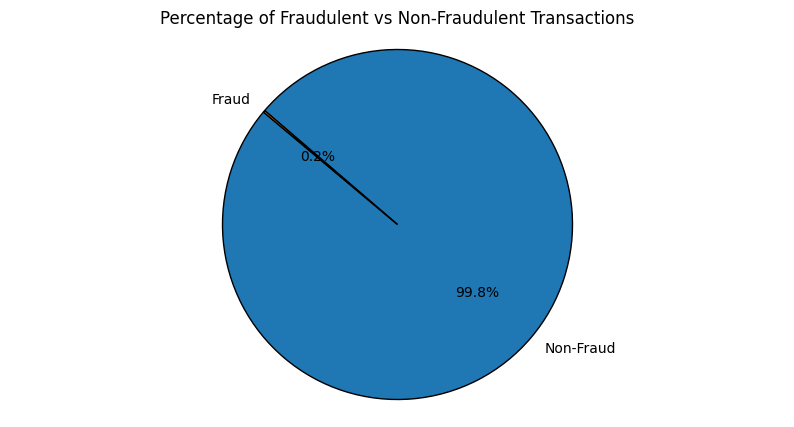

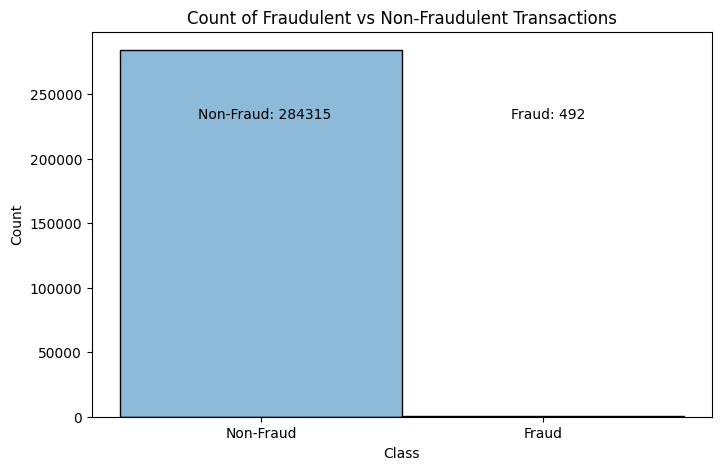

In [98]:
detector.visualize_data()

Conforme mostra o quadro de informações gerais dos dados, não há dados nulos ou ausentes no *dataset*. 

## **Desequilíbrio nos Dados**

Neste conjunto de dados, através do histograma das classes podemos observar que há um alto desequilíbrio dos dados, com a grande maioria dos casos sendo compostos por transações que **não** são fraudulentas.

Quando lidamos com dados altamente desequilibrados em problemas de classificação, como nesse cenário, onde a classe positiva (fraudes) é uma pequena porcentagem do conjunto de dados geral, vários problemas podem surgir.
Entre eles:

- **Viés**: Os modelos de *machine learning* podem tender a ter viés em favor da classe majoritária, já que eles otimizam a precisão geral. Nesse caso, o modelo pode simplesmente classificar a maioria das transações como não fraudulentas para alcançar alta precisão, ignorando completamente a classe minoritária.

- **Generalização**: Modelos treinados em dados desbalanceados podem generalizar mal para novos dados, especialmente para a classe minoritária. Eles podem falhar em capturar os padrões subjacentes da classe minoritária devido à sua representação limitada no conjunto de treinamento.

- **Sensibilidade à Variabilidade**: *Datasets* desbalanceados podem ser altamente sensíveis à variabilidade de amostragem, o que significa que diferentes amostras aleatórias podem levar a modelos e resultados significativamente diferentes.

### **Abordagem em Caso de Desequilíbrio nos Dados**

Existem várias formas possíveis de lidar com *datasets* altamente desequilibrados, uma delas é a subamostragem aleatória da classe majoritária. Essa técnica consiste na remoção aleatória de exemplos da classe majoritária até que a proporção entre as classes se torne mais equilibrada. Na aplicação desse trabalho, vamos reduzir a quantidade de amostras da classe majoritária para que ambas as classes tenham 50% das amostras cada.


#### Dimensionando (*scaling*) os dados e criando uma nova feature
A maioria dos dados já foi dimensionada (devido à transformação do PCA). Na etapa de pré-processamento, dimensionaremos as *features* que restam para serem dimensionadas (Quantidade e Tempo).

In [99]:
# in this case we know that there are no NaN values in the dataset
# we apply the no_nan_data method just to illustrate how it works
detector.no_nan_data()

detector.preprocess_data()
detector.create_features()


*********************************************************************************
                        General information about dataset:                       
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount,ScaledTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


#### Equilibrando os dados através da subamostragem

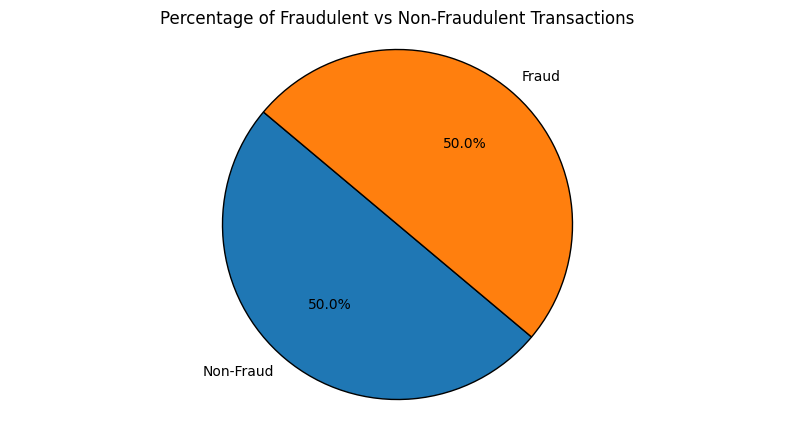

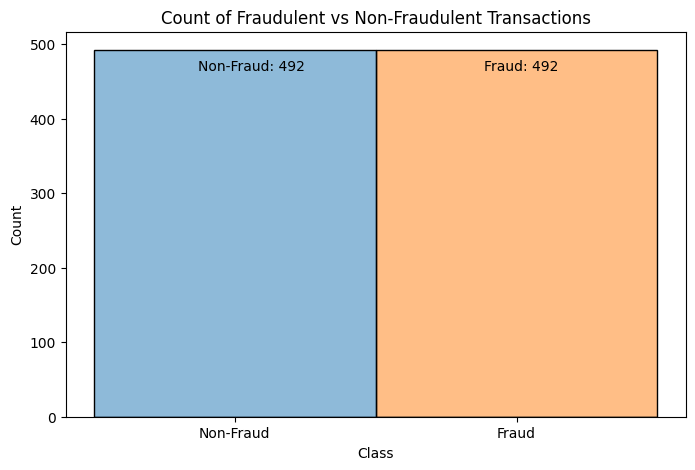

In [100]:
detector.balance_data()
detector.visualize_data()

Uma vez executada a subamostragem aleatória, temos como resultado um *dataset* equilibrado com quantidades iguais para cada classe, conforme mostram as figuras. Neste ponto, os dados estão prontos para serem utilizados nos modelos. 

## **Implementação dos Modelos**

Para implementar os modelos, separamos o *dataset* em duas amostragens, uma para treinar o modelo e outra para testar sua eficácia. Essa divisão permite avaliar o desempenho do modelo em dados não vistos durante o treinamento, fornecendo uma estimativa mais realista de sua capacidade de generalização para novos exemplos. Reservaremos 80% dos dados para treinamento e 20% para avaliação.

Para realizar a tarefa, treinaremos e avaliaremos três modelos distintos. Em seguida, selecionaremos o modelo com melhor desempenho com base nos resultados obtidos por meio da técnica de validação cruzada.


Os modelos escolhidos foram:

- Regressão Logística - Logistic Regression

    A regressão logística é um algoritmo de classificação que é usado para prever a probabilidade de uma observação pertencer a uma determinada classe. Ele funciona modelando a relação entre a variável dependente (a classe que queremos prever) e uma ou mais variáveis independentes (atributos ou *features*). O princípio por trás da regressão logística é que ele usa a função logística para transformar a saída linear de um modelo de regressão linear em uma probabilidade entre 0 e 1. Essa probabilidade é então usada para atribuir uma classe à observação. Durante o treinamento, o algoritmo ajusta os coeficientes do modelo de regressão logística para minimizar a diferença entre as probabilidades previstas e as classes reais das observações no conjunto de treinamento.
    
    Os parâmetros definidos neste modelo é o `n_estimators`, no qual é estabelecido em 100, sendo assim a floresta será composta por um total de 100 árvores, o que pode aumentar a estabilidade e a precisão do modelo. Quanto ao critério de qualidade para dividir os dados (`split`), optou-se pelo Gini, uma medida que avalia a desigualdade entre as classes dentro de um nó. Quando o índice Gini é 0, significa que o nó é completamente puro, ou seja, contém apenas elementos de uma única classe. Essa escolha pode ajudar a garantir a pureza dos nós nas árvores de decisão, o que é crucial para a precisão do modelo de aprendizado de máquina.

<br>


- Floresta Aleatória - Random Forest

    Uma floresta aleatória é um algoritmo de aprendizado de conjunto (*ensemble*) que combina múltiplas árvores de decisão para criar um modelo mais robusto e preciso. O princípio por trás da floresta aleatória é que cada árvore de decisão é treinada em uma amostra aleatória do *dataset* de treinamento e faz previsões independentes. Durante o treinamento, o algoritmo utiliza a técnica de bootstrapping (amostragem com reposição) para criar várias subamostras dos dados de treinamento. Em seguida, para fazer previsões, cada árvore de decisão vota em uma classe com base nas características da observação. A classe com mais votos é então selecionada como a previsão final da floresta aleatória.
    
    Os parâmetros fornecidos na configuração e desempenho do modelo são:`penalty` como 'l2', estamos optando por uma regularização que adiciona um termo quadrático de penalidade, ajudando a evitar overfitting ao lidar com conjuntos de dados com muitas características. A `tol`, ou tolerância, é um critério de parada que indica quando o algoritmo deve parar de iterar, o que é importante para evitar iterações desnecessárias e economizar recursos computacionais. O `solver`, estabelecido como 'liblinear', é particularmente eficaz em conjuntos de dados pequenos a médios e é preferido para problemas lineares ou com poucas características, proporcionando uma solução rápida e precisa. Finalmente, `max_iter` determina o número máximo de iterações permitidas antes que o modelo encerre, garantindo que o algoritmo não entre em loop infinito e seja capaz de convergir para uma solução ótima dentro de um limite de tempo razoável.
<br>

- Máquina de Vetores de Suporte - Support Vector Classifier

    A máquina de vetores de suporte é um algoritmo de classificação que funciona encontrando o hiperplano otimizado que separa as diferentes classes no espaço de características. O princípio por trás do SVC (do inglês *Support Vector Classifier*)  é que ele mapeia os dados de entrada em um espaço de alta dimensionalidade usando uma função de kernel e tenta encontrar o hiperplano que maximiza a margem entre as classes. A margem é a distância entre o hiperplano e os pontos mais próximos de cada classe, chamados de vetores de suporte. Durante o treinamento, o algoritmo ajusta os parâmetros do hiperplano para maximizar a margem e, assim, melhorar a capacidade de generalização do modelo. Em seguida, para fazer previsões, o SVC determina em qual lado do hiperplano uma nova observação cai e a classifica com base nessa decisão.
    
    Devido sua complexidade computacional, esse modelo pode apresentar um tempo de treinamento maior quando aplicado um *dataset* grande. No entanto, o *dataset* resultante subamostragem é pequeno, com apenas 984 entradas, portanto o SVC não deverá apresentar dificuldade computacional em relação à velocidade de treinamento.
    
    Escolhemos o `kernel` do tipo 'rbf' (função de base radial), optamos por um dos kernels mais comumente usados em modelos de classificação. O kernel RBF é especialmente útil para identificar padrões não lineares nos dados, calculando a proximidade entre pontos no espaço de características. Quanto ao `gamma`, que foi configurado como 'auto', essa escolha significa que o valor de gamma será calculado automaticamente, seguindo a fórmula padrão 1/n_features, adaptando-se à dimensionalidade dos dados. Isso ajuda a ajustar a sensibilidade do modelo às variações nos dados de entrada. A `tol`, definida como a tolerância de erro, atua como critério de parada durante o treinamento do modelo, garantindo que o algoritmo pare quando a melhoria na otimização se torna insignificante. 

### **Executando os Modelos**

Após definir e implementar os modelos, iremos separar os dados de treino e teste. Logo em seguida, iremos treinar os três modelos.

In [101]:
# Separando os dados de teste e treino:
X_train, X_test, y_train, y_test = detector.split_data()

# Treinando os modelos através do módulo train_models:
detector.train_models(X_train, y_train)


## **Encontrando o Melhor Modelo**

In [102]:
# Utilizaremos o atributo "select_best_model":
detector.select_best_model(X_train, y_train, X_test, y_test)


*********************************************************************************
                             Cross-Validation Summary                            
*********************************************************************************

Random Forest Model:
	Accuracy: 0.9377
	Precision: 0.9673
	Recall: 0.9032
	F1: 0.9333
	Average Score: 0.9354

Logistic Regression Model:
	Accuracy: 0.9467
	Precision: 0.9686
	Recall: 0.9216
	F1: 0.9433
	Average Score: 0.9450

SVM Model:
	Accuracy: 0.9263
	Precision: 0.9272
	Recall: 0.9215
	F1: 0.9236
	Average Score: 0.9247


Best performing model: Logistic Regression


*********************************************************************************
                    Logistic Regression Overfitting Evaluation                   
*********************************************************************************

Accuracy: 0.0257
Precision: 0.0477
Recall: 0.0007
F1: 0.0224


***********************************************************************

A partir deste teste encontramos que o melhor modelo é o de Regressão Logística. 
Os valores baixos obtidos nas métricas da análise de overfitting são desejáveis, pois indicam proximidade entre os *scores* obtidos no *dataset* de treinamento e de teste.

### **Curva de aprendizagem (*learning curve*) do melhor modelo**
O gráfico da curva de aprendizagem é uma representação visual que mostra como o desempenho do modelo varia conforme o tamanho do conjunto de treinamento aumenta. 
Quanto maior a lacuna entre o *score* do *dataset* de treinamento e o *score* da validação cruzada maior será a probabilidade de haver overfitting no modelo. *Overfitting*, ou sobreajuste, é um fenômeno no qual o modelo se ajusta muito bem aos dados de treinamento, mas tem um desempenho pior ao ser aplicado a novos dados que não foram usados durante o treinamento. Ou seja, o modelo aprende a representar não apenas os padrões verdadeiros nos dados, mas também o ruído aleatório ou as particularidades específicas do *dataset* de treinamento.

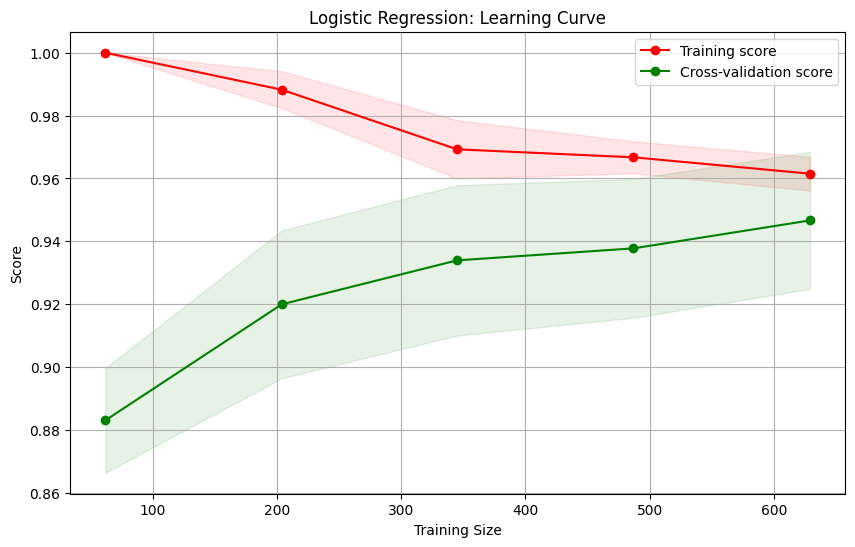

In [103]:
detector.plot_learning_curve(X_train, y_train)

## **Conclusões**

Explorando um conjunto de dados voltado para detecção de fraudes em transações de cartão de crédito, embarcamos em uma abordagem de programação orientada a objetos em Python para desenvolver uma classe capaz de empregar três modelos distintos de machine learning na classificação das transações como fraudulentas ou legítimas. Deparamos com a necessidade de balancear os dados para garantir um treinamento eficaz dos modelos, resultando em uma amostra composta por 984 entradas. Os modelos escolhidos para este fim foram Random Florest, Regressão Logística e SVM, cada um com seus parâmetros meticulosamente ajustados.

Avaliamos minuciosamente a performance de cada modelo, buscando identificar aquele que melhor se destacasse na tarefa de detecção de fraudes em transações de cartão de crédito. A análise abarcou métricas fundamentais como acurácia, precisão, F1-Score e média de pontuação, revelando que o modelo mais eficaz é aquele que emprega a regressão logística como algoritmo de aprendizado de máquina.

Este estudo não apenas evidenciou a importância das etapas de pré-processamento, incluindo filtragem e balanceamento dos dados, mas também a relevância da seleção criteriosa dos parâmetros, adaptando-os ao contexto do problema em questão. Além disso, destacou-se a utilidade das técnicas de comparação entre modelos na escolha do mais adequado para a tarefa. Sobretudo, o trabalho ressaltou os benefícios da abordagem de programação orientada a objetos, não apenas como uma ferramenta de implementação, mas como uma estrutura organizacional que facilita a compreensão, manutenção e expansão do código, proporcionando uma experiência valiosa e enriquecedora no campo do machine learning.